### **Aim**  
The motive of this assignment is to make predictions using **Linear Regression**. To make sure you truly understand how the underlying algorithm works, you are to implement it from scratch.

### Generating the dataset  
Run the cell below to create the dataset. It further splits the available data into training and testing. Please do not edit this cell.


In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=20, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [2]:
print(X_train.shape)
print(y_train.shape)

(80, 5)
(80,)


### Visualizing the data  
Use `matplotlib` to visualize the given data.

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 90}

plt.rc('font', **font)
import seaborn as sns
# fig = plt.figure()
fig, axes = plt.subplots(nrows=1, ncols=5, figsize = (300,50))
plt.tight_layout()
i =0;
for ax in axes:
  ax.plot(X_train[:,i],y_train,'g',lw=10)
  ax.set_xlabel('X')
  ax.set_ylabel('y')
  ax.set_title('feature-'+ str(i))
  i=i+1

# X_train
# y_train
# sns.pairplot(x= X_train, y = y_train)
# Your code here

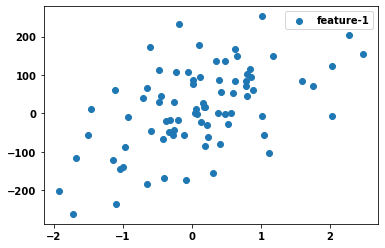

In [12]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 10}

plt.rc('font', **font)
plt.scatter(X_train[:,0],y_train, label = 'feature-1')
plt.legend(loc='best')

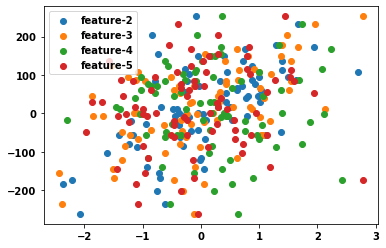

In [13]:
plt.scatter(X_train[:,1],y_train, label = "feature-2")
plt.scatter(X_train[:,2],y_train, label = "feature-3")
plt.scatter(X_train[:,3],y_train, label = "feature-4")
plt.scatter(X_train[:,4],y_train, label = "feature-5")
plt.legend(loc='best')

You should be able to see the linear relations between `y` and the features in vector `X`.

### Gradient Descent Review  
1. ####  Cost function
Define the `cost function` to measure the difference between predictions and target outputs. Here, we are working with first degree polynomial, so derivatives are easy to calculate. ( Linear function `y = wx +b` )  

$$Error = \frac{1}{N}\sum_{i=1}^N (y_i - \overline{y}_i)^2 = \frac{1}{N}\sum_{i=1}^N (y_i - (x_iw+b))^2 $$  

  where `N` is the number of samples  
    


2. #### Compute the derivative
$$\frac{\delta Error}{\delta w} = \frac{2}{N}\sum_{i=1}^N -x_i(y_i -(m  x_i +b ))  $$
$$\frac{\delta Error}{\delta b} = \frac{2}{N}\sum_{i=1}^N -(y_i -(m  x_i +b ))  $$
3. <h4>Update current parameters</h4>
$$ w:= w- learning\_rate \cdot \frac{\delta Error}{\delta w}   $$ 
$$ b:= b- learning\_rate \cdot \frac{\delta Error}{\delta b}   $$ 
4. <h4>Repeat until it fits good enough</h4>


### Model definition

Complete the functions in the class below. Hints provided at appropriate places.

In [6]:
import numpy as np

class LinearRegression:

    # The __init__ is called when we make any object of our class. Here, you are to specify the default values for 
    # Learning Rate, Number of Iterations, Weights and Biases. It doesn't return anything.
    # Hint: Google what a `self pointer` is and figure out how it can be used here.
    def __init__(self, learning_rate=0.001, n_iters=1000):
        self.learning_rate = learning_rate
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        # Your code here

        pass  # Uncomment this when you're done with this function


    # The following function would be the heart of the model. This is where the training would happen. 
    # You're supposed to iterate and keep on updating the weights and biases according to the steps of Gradient Descent.
    def fit(self, X, y):
        n_records, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iters):
            cost = 1/n_records * np.square(y - (np.dot(X,self.weights) + self.bias))
            der_w = -2/n_records *(np.dot(X.T, (y - np.matmul(X,self.weights ) - self.bias)))
            der_b = -2/n_records *np.sum((y - np.matmul(X, self.weights ) - self.bias))
            self.weights = self.weights - self.learning_rate * der_w
            self.bias = self.bias - self.learning_rate *der_b
        
        
        # Gradient Descent code goes here

        #         pass  # Uncomment this when you're done with this function
        
        
    # This function will be called after our model has been trained and we are predicting on unseen data
    # What is our prediction? Just return that
    def predict(self, X):
#         print(self.weights.shape)
#         print(self.bias.shape)
#         print(X.shape)
        return np.dot(X,self.weights)+ self.bias
        # Code goes here

#         pass  # Uncomment this when you're done with this function

### Initializing, Training & Predictions

In [7]:
# Now, we make an object of our custom class.
regressor = LinearRegression() # You may pass the custom parameters or let the default values take it ahead

# Call the fit method on the object to train (pass appropriate part of dataset)
regressor.fit(X_train,y_train)
# print(X_test.shape)

# Now, let's see our what our model predicts
predictions = regressor.predict(X_test) # pass appropriate part of dataset

In [8]:
predictions.shape

(20,)

### Evaluate the model   

Return [Mean Squared Error](https://en.wikipedia.org/wiki/Mean_squared_error) & [R2 Score](https://www.ncl.ac.uk/webtemplate/ask-assets/external/maths-resources/statistics/regression-and-correlation/coefficient-of-determination-r-squared.html#:~:text=%C2%AFy) from the functions below.

In [9]:
def mean_squared_error(y_true, y_pred):
    N  = y_true.shape
    return np.sqrt(1/N[0] * np.sum(np.square(y_true-y_pred)))
       # return the mean squared error
#        pass  # Uncomment this when you're done with this function


def r2_score(y_true, y_pred):
    N = np.sum(np.square(y_true-y_pred))/np.sum(np.square(y_true - np.mean(y_true)))
    return 1-N
      # return the r2 score
#       pass  # Uncomment this when you're done with this function
          

mse = mean_squared_error(y_test,predictions) # Pass appropriate parts of dataset
print("MSE:", mse)

accu = r2_score(y_test,predictions) # Pass appropriate parts of dataset
print("Accuracy:", accu)

MSE: 25.67959613030683
Accuracy: 0.9376571817229341
